In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
import tensorflow as tf
from sklearn.datasets import load_boston
from sklearn.preprocessing import scale
from matplotlib import pyplot as plt
%matplotlib inline

/home/motoofi/miniconda2/envs/mlp/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
def get_error_and_accuracy(X,Y,error,sess):
    err = 0
    err += sess.run(error, feed_dict={inputs: X, targets: Y})
    return err

In [3]:
def make_kaggle_submission_file(predictions, modelName):
    ofile  = open('./results/Kaggle_submision_{0}.csv'.format(modelName), "wb")
    writer = csv.writer(ofile)
    writer.writerow(["Id","EpiOrStroma"])
    for i,score in enumerate(predictions):
        writer.writerow([i,score])

    ofile.close()

In [4]:
# Loading data set
data_x_train = pd.read_csv("./X_train.csv")
X_test = pd.read_csv("./X_test.csv")
data_y_train = pd.read_csv("./y_train.csv")
# Splitting data set into training and validation sets. 20% of data set is used for validation.
X_train, X_val, Y_train, Y_val = train_test_split(data_x_train, data_y_train, test_size = 0.2, random_state = 0)

In [5]:
#Feature scaling
# It is not needed to scale Ys because they indicate what class a data point belongs to. They are either 1 or 2.
sc_X = StandardScaler()
X_train_scaled = pd.DataFrame(sc_X.fit_transform(X_train))
X_test_scaled = pd.DataFrame(sc_X.transform(X_test))
X_val_scaled = pd.DataFrame(sc_X.transform(X_val))

sc_Y = StandardScaler()
Y_train_scaled = pd.DataFrame(sc_Y.fit_transform(Y_train['PRP'].reshape(-1,1)))
Y_val_scaled = pd.DataFrame(sc_Y.transform(Y_val['PRP'].reshape(-1,1)))

/home/motoofi/miniconda2/envs/mlp/lib/python2.7/site-packages/ipykernel_launcher.py:9: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if __name__ == '__main__':
/home/motoofi/miniconda2/envs/mlp/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/motoofi/miniconda2/envs/mlp/lib/python2.7/site-packages/ipykernel_launcher.py:10: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  # Remove the CWD from sys.path while we load stuff.


In [6]:
w = tf.Variable(tf.truncated_normal([6, 1], mean=0.0, stddev=1.0, dtype=tf.float64))
b = tf.Variable(tf.zeros(1, dtype = tf.float64))

In [7]:
learning_rate = 0.001
epochs = 5000

inputs = tf.placeholder(tf.float64, [None, 6], 'inputs')
targets = tf.placeholder(tf.float64, [None], 'targets')
predictions = tf.nn.relu(tf.add(b, tf.matmul(inputs, w)))
error = tf.reduce_mean(tf.square(targets - predictions)+(10*tf.nn.l2_loss(w)))
#regularizer = tf.nn.l2_loss(weights)
#loss = tf.reduce_mean(loss + beta * regularizer)

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(error)

sess = tf.InteractiveSession()
init_op = tf.global_variables_initializer()
sess.run(init_op)

In [8]:
errors_tr = list()
errors_va = list()
for e in range(epochs):
    running_error = 0.
    _, batch_error = sess.run([optimizer, error], feed_dict={inputs: X_train_scaled, targets: Y_train['PRP']})
    
    running_error += batch_error
    errors_tr.append(running_error)
    print('End of epoch {0}: running error average = {1:.2f}'.format(e + 1, running_error))
    if e % 10 == 0:
        errors_va.append(get_error_and_accuracy(X_val_scaled,Y_val['PRP'],error,sess))
        print('Valid data: Error={0:.2f}'.format(errors_va[-1]))
        
pre = sess.run(predictions, feed_dict={inputs: X_test})


End of epoch 1: running error average = 31152.87
Valid data: Error=71527.90
End of epoch 2: running error average = 31137.04
End of epoch 3: running error average = 31120.88
End of epoch 4: running error average = 31104.47
End of epoch 5: running error average = 31088.32
End of epoch 6: running error average = 31072.20
End of epoch 7: running error average = 31055.95
End of epoch 8: running error average = 31039.15
End of epoch 9: running error average = 31022.55
End of epoch 10: running error average = 31006.02
End of epoch 11: running error average = 30989.58
Valid data: Error=71052.95
End of epoch 12: running error average = 30973.19
End of epoch 13: running error average = 30956.92
End of epoch 14: running error average = 30940.39
End of epoch 15: running error average = 30923.89
End of epoch 16: running error average = 30907.03
End of epoch 17: running error average = 30890.19
End of epoch 18: running error average = 30873.53
End of epoch 19: running error average = 30856.94
End o

End of epoch 157: running error average = 27608.18
End of epoch 158: running error average = 27586.68
End of epoch 159: running error average = 27565.28
End of epoch 160: running error average = 27543.97
End of epoch 161: running error average = 27522.76
Valid data: Error=65383.86
End of epoch 162: running error average = 27501.65
End of epoch 163: running error average = 27480.64
End of epoch 164: running error average = 27459.72
End of epoch 165: running error average = 27438.89
End of epoch 166: running error average = 27418.16
End of epoch 167: running error average = 27397.52
End of epoch 168: running error average = 27376.97
End of epoch 169: running error average = 27356.52
End of epoch 170: running error average = 27336.15
End of epoch 171: running error average = 27315.88
Valid data: Error=65036.62
End of epoch 172: running error average = 27295.69
End of epoch 173: running error average = 27275.60
End of epoch 174: running error average = 27255.59
End of epoch 175: running er

End of epoch 375: running error average = 24533.69
End of epoch 376: running error average = 24524.93
End of epoch 377: running error average = 24516.21
End of epoch 378: running error average = 24507.52
End of epoch 379: running error average = 24498.86
End of epoch 380: running error average = 24490.24
End of epoch 381: running error average = 24481.65
Valid data: Error=59466.72
End of epoch 382: running error average = 24473.10
End of epoch 383: running error average = 24464.58
End of epoch 384: running error average = 24456.10
End of epoch 385: running error average = 24447.65
End of epoch 386: running error average = 24439.23
End of epoch 387: running error average = 24430.85
End of epoch 388: running error average = 24422.50
End of epoch 389: running error average = 24414.19
End of epoch 390: running error average = 24405.90
End of epoch 391: running error average = 24397.65
Valid data: Error=59274.25
End of epoch 392: running error average = 24389.44
End of epoch 393: running er

End of epoch 642: running error average = 23094.32
End of epoch 643: running error average = 23091.31
End of epoch 644: running error average = 23088.32
End of epoch 645: running error average = 23085.33
End of epoch 646: running error average = 23082.36
End of epoch 647: running error average = 23079.40
End of epoch 648: running error average = 23076.46
End of epoch 649: running error average = 23073.52
End of epoch 650: running error average = 23070.60
End of epoch 651: running error average = 23067.68
Valid data: Error=55761.97
End of epoch 652: running error average = 23064.78
End of epoch 653: running error average = 23061.90
End of epoch 654: running error average = 23059.02
End of epoch 655: running error average = 23056.15
End of epoch 656: running error average = 23053.30
End of epoch 657: running error average = 23050.45
End of epoch 658: running error average = 23047.62
End of epoch 659: running error average = 23044.80
End of epoch 660: running error average = 23041.99
End 

End of epoch 941: running error average = 22569.10
Valid data: Error=53854.55
End of epoch 942: running error average = 22568.19
End of epoch 943: running error average = 22567.29
End of epoch 944: running error average = 22566.39
End of epoch 945: running error average = 22565.49
End of epoch 946: running error average = 22564.59
End of epoch 947: running error average = 22563.70
End of epoch 948: running error average = 22562.82
End of epoch 949: running error average = 22561.93
End of epoch 950: running error average = 22561.06
End of epoch 951: running error average = 22560.18
Valid data: Error=53810.14
End of epoch 952: running error average = 22559.31
End of epoch 953: running error average = 22558.44
End of epoch 954: running error average = 22557.57
End of epoch 955: running error average = 22556.71
End of epoch 956: running error average = 22555.85
End of epoch 957: running error average = 22555.00
End of epoch 958: running error average = 22554.14
End of epoch 959: running er

End of epoch 1244: running error average = 22409.37
End of epoch 1245: running error average = 22409.10
End of epoch 1246: running error average = 22408.83
End of epoch 1247: running error average = 22408.57
End of epoch 1248: running error average = 22408.30
End of epoch 1249: running error average = 22408.03
End of epoch 1250: running error average = 22407.77
End of epoch 1251: running error average = 22407.51
Valid data: Error=52864.86
End of epoch 1252: running error average = 22407.24
End of epoch 1253: running error average = 22406.98
End of epoch 1254: running error average = 22406.72
End of epoch 1255: running error average = 22406.46
End of epoch 1256: running error average = 22406.20
End of epoch 1257: running error average = 22405.95
End of epoch 1258: running error average = 22405.69
End of epoch 1259: running error average = 22405.43
End of epoch 1260: running error average = 22405.18
End of epoch 1261: running error average = 22404.93
Valid data: Error=52843.19
End of epo

End of epoch 1535: running error average = 22362.88
End of epoch 1536: running error average = 22362.80
End of epoch 1537: running error average = 22362.72
End of epoch 1538: running error average = 22362.63
End of epoch 1539: running error average = 22362.55
End of epoch 1540: running error average = 22362.47
End of epoch 1541: running error average = 22362.38
Valid data: Error=52395.54
End of epoch 1542: running error average = 22362.30
End of epoch 1543: running error average = 22362.22
End of epoch 1544: running error average = 22362.14
End of epoch 1545: running error average = 22362.06
End of epoch 1546: running error average = 22361.98
End of epoch 1547: running error average = 22361.89
End of epoch 1548: running error average = 22361.81
End of epoch 1549: running error average = 22361.73
End of epoch 1550: running error average = 22361.65
End of epoch 1551: running error average = 22361.58
Valid data: Error=52384.05
End of epoch 1552: running error average = 22361.50
End of epo

End of epoch 1834: running error average = 22348.18
End of epoch 1835: running error average = 22348.15
End of epoch 1836: running error average = 22348.13
End of epoch 1837: running error average = 22348.10
End of epoch 1838: running error average = 22348.08
End of epoch 1839: running error average = 22348.05
End of epoch 1840: running error average = 22348.03
End of epoch 1841: running error average = 22348.00
Valid data: Error=52137.77
End of epoch 1842: running error average = 22347.98
End of epoch 1843: running error average = 22347.95
End of epoch 1844: running error average = 22347.93
End of epoch 1845: running error average = 22347.90
End of epoch 1846: running error average = 22347.88
End of epoch 1847: running error average = 22347.85
End of epoch 1848: running error average = 22347.83
End of epoch 1849: running error average = 22347.81
End of epoch 1850: running error average = 22347.78
End of epoch 1851: running error average = 22347.76
Valid data: Error=52131.67
End of epo

End of epoch 2123: running error average = 22343.81
End of epoch 2124: running error average = 22343.81
End of epoch 2125: running error average = 22343.80
End of epoch 2126: running error average = 22343.79
End of epoch 2127: running error average = 22343.78
End of epoch 2128: running error average = 22343.77
End of epoch 2129: running error average = 22343.77
End of epoch 2130: running error average = 22343.76
End of epoch 2131: running error average = 22343.75
Valid data: Error=52003.29
End of epoch 2132: running error average = 22343.74
End of epoch 2133: running error average = 22343.74
End of epoch 2134: running error average = 22343.73
End of epoch 2135: running error average = 22343.72
End of epoch 2136: running error average = 22343.71
End of epoch 2137: running error average = 22343.71
End of epoch 2138: running error average = 22343.70
End of epoch 2139: running error average = 22343.69
End of epoch 2140: running error average = 22343.68
End of epoch 2141: running error aver

End of epoch 2412: running error average = 22342.44
End of epoch 2413: running error average = 22342.44
End of epoch 2414: running error average = 22342.44
End of epoch 2415: running error average = 22342.43
End of epoch 2416: running error average = 22342.43
End of epoch 2417: running error average = 22342.43
End of epoch 2418: running error average = 22342.43
End of epoch 2419: running error average = 22342.43
End of epoch 2420: running error average = 22342.42
End of epoch 2421: running error average = 22342.42
Valid data: Error=51929.08
End of epoch 2422: running error average = 22342.42
End of epoch 2423: running error average = 22342.42
End of epoch 2424: running error average = 22342.41
End of epoch 2425: running error average = 22342.41
End of epoch 2426: running error average = 22342.41
End of epoch 2427: running error average = 22342.41
End of epoch 2428: running error average = 22342.40
End of epoch 2429: running error average = 22342.40
End of epoch 2430: running error aver

End of epoch 2705: running error average = 22342.01
End of epoch 2706: running error average = 22342.01
End of epoch 2707: running error average = 22342.01
End of epoch 2708: running error average = 22342.01
End of epoch 2709: running error average = 22342.01
End of epoch 2710: running error average = 22342.00
End of epoch 2711: running error average = 22342.00
Valid data: Error=51887.88
End of epoch 2712: running error average = 22342.00
End of epoch 2713: running error average = 22342.00
End of epoch 2714: running error average = 22342.00
End of epoch 2715: running error average = 22342.00
End of epoch 2716: running error average = 22342.00
End of epoch 2717: running error average = 22342.00
End of epoch 2718: running error average = 22342.00
End of epoch 2719: running error average = 22342.00
End of epoch 2720: running error average = 22342.00
End of epoch 2721: running error average = 22342.00
Valid data: Error=51886.85
End of epoch 2722: running error average = 22342.00
End of epo

End of epoch 2855: running error average = 22341.92
End of epoch 2856: running error average = 22341.92
End of epoch 2857: running error average = 22341.92
End of epoch 2858: running error average = 22341.92
End of epoch 2859: running error average = 22341.92
End of epoch 2860: running error average = 22341.92
End of epoch 2861: running error average = 22341.92
Valid data: Error=51874.35
End of epoch 2862: running error average = 22341.92
End of epoch 2863: running error average = 22341.92
End of epoch 2864: running error average = 22341.92
End of epoch 2865: running error average = 22341.92
End of epoch 2866: running error average = 22341.92
End of epoch 2867: running error average = 22341.92
End of epoch 2868: running error average = 22341.91
End of epoch 2869: running error average = 22341.91
End of epoch 2870: running error average = 22341.91
End of epoch 2871: running error average = 22341.91
Valid data: Error=51873.59
End of epoch 2872: running error average = 22341.91
End of epo

End of epoch 3143: running error average = 22341.85
End of epoch 3144: running error average = 22341.85
End of epoch 3145: running error average = 22341.85
End of epoch 3146: running error average = 22341.85
End of epoch 3147: running error average = 22341.85
End of epoch 3148: running error average = 22341.85
End of epoch 3149: running error average = 22341.85
End of epoch 3150: running error average = 22341.85
End of epoch 3151: running error average = 22341.85
Valid data: Error=51857.38
End of epoch 3152: running error average = 22341.85
End of epoch 3153: running error average = 22341.85
End of epoch 3154: running error average = 22341.85
End of epoch 3155: running error average = 22341.85
End of epoch 3156: running error average = 22341.85
End of epoch 3157: running error average = 22341.85
End of epoch 3158: running error average = 22341.85
End of epoch 3159: running error average = 22341.85
End of epoch 3160: running error average = 22341.85
End of epoch 3161: running error aver

End of epoch 3436: running error average = 22341.82
End of epoch 3437: running error average = 22341.82
End of epoch 3438: running error average = 22341.82
End of epoch 3439: running error average = 22341.82
End of epoch 3440: running error average = 22341.82
End of epoch 3441: running error average = 22341.82
Valid data: Error=51847.90
End of epoch 3442: running error average = 22341.82
End of epoch 3443: running error average = 22341.82
End of epoch 3444: running error average = 22341.82
End of epoch 3445: running error average = 22341.82
End of epoch 3446: running error average = 22341.82
End of epoch 3447: running error average = 22341.82
End of epoch 3448: running error average = 22341.82
End of epoch 3449: running error average = 22341.82
End of epoch 3450: running error average = 22341.82
End of epoch 3451: running error average = 22341.82
Valid data: Error=51847.66
End of epoch 3452: running error average = 22341.82
End of epoch 3453: running error average = 22341.82
End of epo

End of epoch 3685: running error average = 22341.82
End of epoch 3686: running error average = 22341.82
End of epoch 3687: running error average = 22341.82
End of epoch 3688: running error average = 22341.82
End of epoch 3689: running error average = 22341.82
End of epoch 3690: running error average = 22341.82
End of epoch 3691: running error average = 22341.82
Valid data: Error=51843.16
End of epoch 3692: running error average = 22341.82
End of epoch 3693: running error average = 22341.82
End of epoch 3694: running error average = 22341.82
End of epoch 3695: running error average = 22341.82
End of epoch 3696: running error average = 22341.82
End of epoch 3697: running error average = 22341.82
End of epoch 3698: running error average = 22341.82
End of epoch 3699: running error average = 22341.82
End of epoch 3700: running error average = 22341.82
End of epoch 3701: running error average = 22341.82
Valid data: Error=51843.02
End of epoch 3702: running error average = 22341.82
End of epo

End of epoch 3971: running error average = 22341.81
Valid data: Error=51840.03
End of epoch 3972: running error average = 22341.81
End of epoch 3973: running error average = 22341.81
End of epoch 3974: running error average = 22341.81
End of epoch 3975: running error average = 22341.81
End of epoch 3976: running error average = 22341.81
End of epoch 3977: running error average = 22341.81
End of epoch 3978: running error average = 22341.81
End of epoch 3979: running error average = 22341.81
End of epoch 3980: running error average = 22341.81
End of epoch 3981: running error average = 22341.81
Valid data: Error=51839.95
End of epoch 3982: running error average = 22341.81
End of epoch 3983: running error average = 22341.81
End of epoch 3984: running error average = 22341.81
End of epoch 3985: running error average = 22341.81
End of epoch 3986: running error average = 22341.81
End of epoch 3987: running error average = 22341.81
End of epoch 3988: running error average = 22341.81
End of epo

End of epoch 4267: running error average = 22341.81
End of epoch 4268: running error average = 22341.81
End of epoch 4269: running error average = 22341.81
End of epoch 4270: running error average = 22341.81
End of epoch 4271: running error average = 22341.81
Valid data: Error=51838.16
End of epoch 4272: running error average = 22341.81
End of epoch 4273: running error average = 22341.81
End of epoch 4274: running error average = 22341.81
End of epoch 4275: running error average = 22341.81
End of epoch 4276: running error average = 22341.81
End of epoch 4277: running error average = 22341.81
End of epoch 4278: running error average = 22341.81
End of epoch 4279: running error average = 22341.81
End of epoch 4280: running error average = 22341.81
End of epoch 4281: running error average = 22341.81
Valid data: Error=51838.11
End of epoch 4282: running error average = 22341.81
End of epoch 4283: running error average = 22341.81
End of epoch 4284: running error average = 22341.81
End of epo

End of epoch 4560: running error average = 22341.81
End of epoch 4561: running error average = 22341.81
Valid data: Error=51837.15
End of epoch 4562: running error average = 22341.81
End of epoch 4563: running error average = 22341.81
End of epoch 4564: running error average = 22341.81
End of epoch 4565: running error average = 22341.81
End of epoch 4566: running error average = 22341.81
End of epoch 4567: running error average = 22341.81
End of epoch 4568: running error average = 22341.81
End of epoch 4569: running error average = 22341.81
End of epoch 4570: running error average = 22341.81
End of epoch 4571: running error average = 22341.81
Valid data: Error=51837.13
End of epoch 4572: running error average = 22341.81
End of epoch 4573: running error average = 22341.81
End of epoch 4574: running error average = 22341.81
End of epoch 4575: running error average = 22341.81
End of epoch 4576: running error average = 22341.81
End of epoch 4577: running error average = 22341.81
End of epo

End of epoch 4853: running error average = 22341.81
End of epoch 4854: running error average = 22341.81
End of epoch 4855: running error average = 22341.81
End of epoch 4856: running error average = 22341.81
End of epoch 4857: running error average = 22341.81
End of epoch 4858: running error average = 22341.81
End of epoch 4859: running error average = 22341.81
End of epoch 4860: running error average = 22341.81
End of epoch 4861: running error average = 22341.81
Valid data: Error=51836.57
End of epoch 4862: running error average = 22341.81
End of epoch 4863: running error average = 22341.81
End of epoch 4864: running error average = 22341.81
End of epoch 4865: running error average = 22341.81
End of epoch 4866: running error average = 22341.81
End of epoch 4867: running error average = 22341.81
End of epoch 4868: running error average = 22341.81
End of epoch 4869: running error average = 22341.81
End of epoch 4870: running error average = 22341.81
End of epoch 4871: running error aver

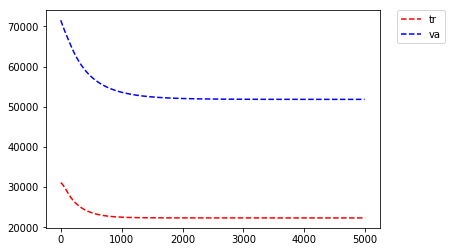

In [9]:
plt.plot( range(0,epochs),errors_tr, 'r--',label='tr')
plt.plot(range(0,epochs,10),errors_va, 'b--',label='va')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [10]:
inversed_predictions = sc_Y.inverse_transform(pre)

In [11]:
inversed_predictions

array([[14271.69575954],
       [14271.69575954],
       [14271.69575954],
       [14271.69575954],
       [14271.69575954],
       [14271.69575954],
       [14271.69575954],
       [14271.69575954],
       [14271.69575954],
       [14271.69575954],
       [14271.69575954],
       [14271.69575954],
       [14271.69575954],
       [14271.69575954],
       [14271.69575954],
       [14271.69575954],
       [14271.69575954],
       [14271.69575954],
       [14271.69575954],
       [14271.69575954],
       [14271.69575954],
       [14271.69575954],
       [14271.69575954],
       [14271.69575954],
       [14271.69575954],
       [14271.69575954],
       [14271.69575954],
       [14271.69575954],
       [14271.69575954],
       [14271.69575954],
       [14271.69575954],
       [14271.69575954],
       [14271.69575954],
       [14271.69575954],
       [14271.69575954],
       [14271.69575954],
       [14271.69575954],
       [14271.69575954],
       [14271.69575954],
       [14271.69575954],
